In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv
/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv


In [19]:
df = pd.read_csv("/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv")
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


Data seti 310 satır veriden oluşmaktadır.

In [21]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [22]:
color_list = ['red' if i=="Abnormal" else 'green' for i in df.loc[:,'class']]

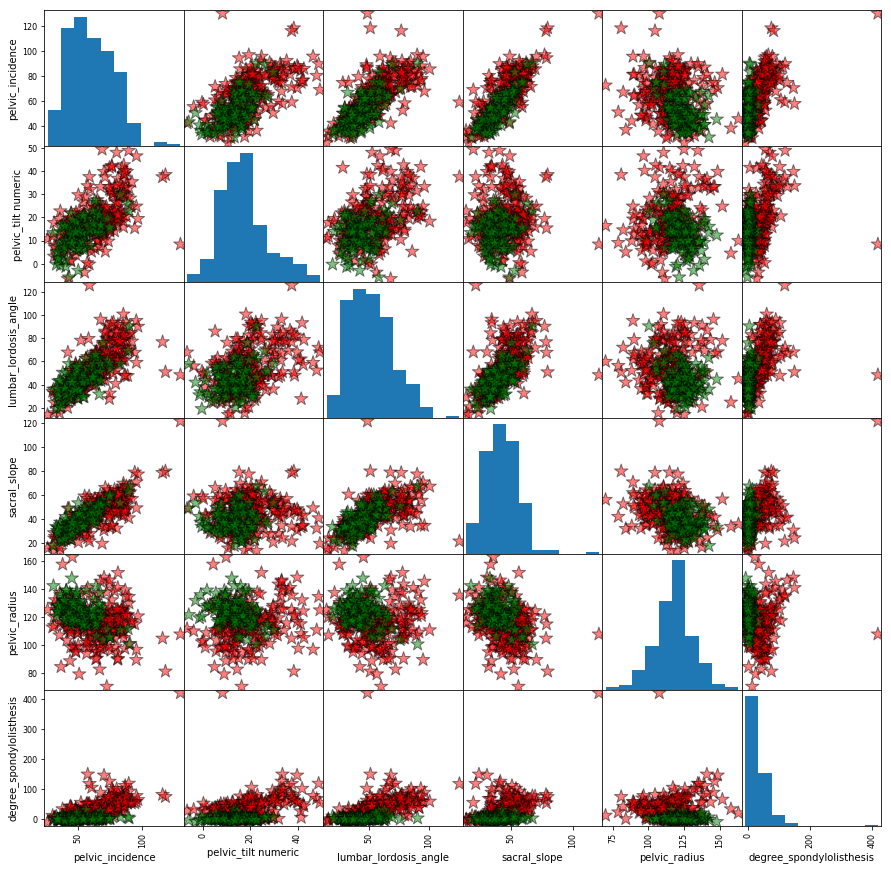

In [23]:
pd.plotting.scatter_matrix(df.loc[:, df.columns !='class'],
                                       c=color_list,
                                       figsize=[15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s=200,
                                       marker="*",
                                       edgecolor="black")
plt.show()

### Regression
-> Supervised Learning

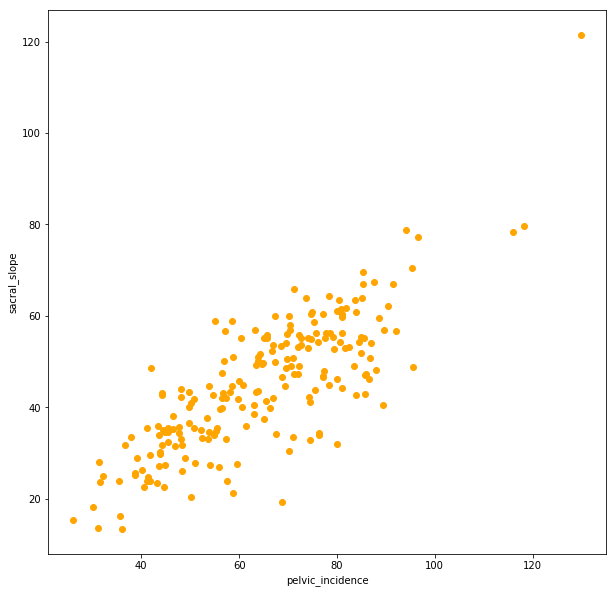

In [34]:
data = df[df['class']=="Abnormal"]
x = np.array(data.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data.loc[:,'sacral_slope']).reshape(-1,1)

#scatter
plt.figure(figsize=[10,10])
plt.scatter(x,y,color="orange")
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

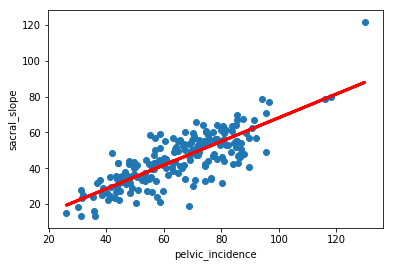

In [46]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#fit
lr.fit(x,y)

#predicted 
y_head = lr.predict(x)

# scatter
plt.plot(x, y_head, color='red', linewidth=3)
plt.scatter(x,y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

### R_Square 
Predict sonucunun ne kadar doğru olup olmadığını değerlendirir.
Sonuç 1'e ne kadar yakınsa sonuç o kadar iyi demektir.

In [47]:
from sklearn.metrics import r2_score
print("RSquare : ",r2_score(y,y_head))

RSquare :  0.6458410481075871
